# Introduction to Statsmodels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

C:\Users\IS96347\AppData\Local\Continuum\anaconda3\envs\pyfinance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = sm.datasets.macrodata.load_pandas().data

In [4]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [5]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [6]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [7]:
df.index = index

In [8]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


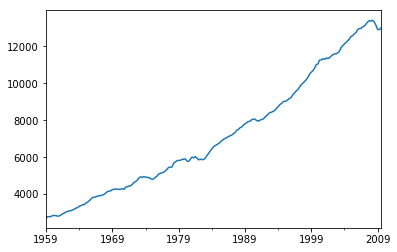

In [9]:
df['realgdp'].plot()

## Using Statsmodels to get the trend

The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

In [10]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

In [11]:
gdp_cycle.head()

1959-03-31    39.511915
1959-06-30    80.088532
1959-09-30    48.875455
1959-12-31    30.591933
1960-03-31    64.882667
Name: realgdp, dtype: float64

In [12]:
gdp_trend.head()

1959-03-31    2670.837085
1959-06-30    2698.712468
1959-09-30    2726.612545
1959-12-31    2754.612067
1960-03-31    2782.816333
Name: realgdp, dtype: float64

In [13]:
type(gdp_trend)

pandas.core.series.Series

In [14]:
df["trend"] = gdp_trend

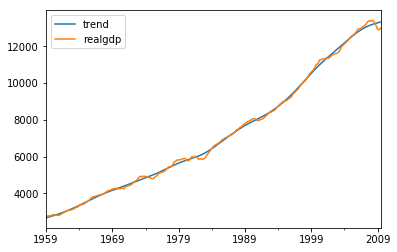

In [15]:
df[['trend','realgdp']].plot()

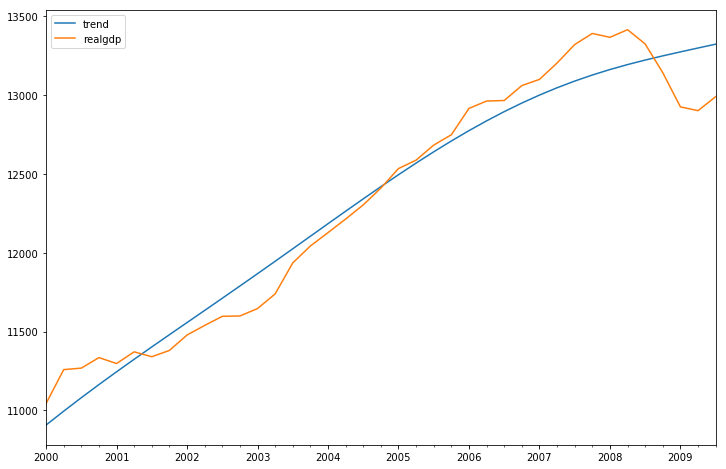

In [16]:
df[['trend','realgdp']]["2000-03-31":].plot(figsize=(12,8))

# SMA - EWMA

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
airline = pd.read_csv('../08-Time-Series-Analysis/airline_passengers.csv',index_col="Month")

In [26]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 1949-01 to International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Data columns (total 1 columns):
Thousands of Passengers    144 non-null float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [27]:
airline.dropna(inplace=True)

In [28]:
airline.index = pd.to_datetime(airline.index)

In [29]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Thousands of Passengers    144 non-null float64
dtypes: float64(1)
memory usage: 2.2 KB


In [30]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


# SMA

## Simple Moving Average

In [31]:
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()

In [32]:
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN


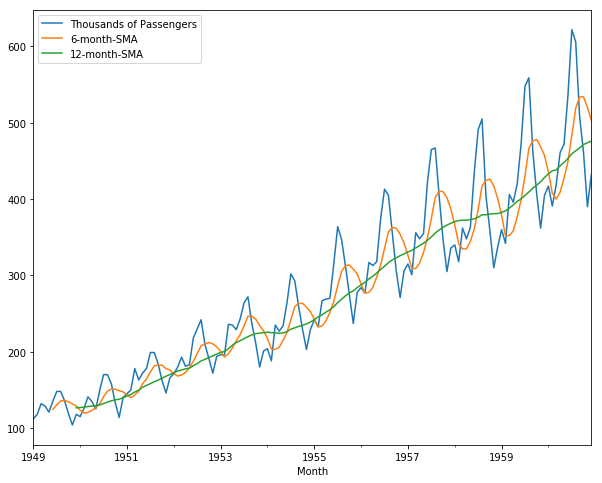

In [34]:
airline.plot(figsize=(10,8));

# EWMA

## Exponentially-weighted moving average 

We just showed how to calculate the SMA based on some window.However, basic SMA has some "weaknesses".
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an EWMA (Exponentially-weighted moving average).

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows)
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:

$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i} $

Where x_t is the input value, w_i is the applied weight (Note how it can change from i=0 to t), and y_t is the output.

Now the question is, how to we define the weight term w_i ?

This depends on the adjust parameter you provide to the .ewm() method.

When adjust is True (default), weighted averages are calculated using weights:

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When adjust=False is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When adjust=True we have y0=x0 and from the last representation above we have yt=αxt+(1−α)yt−1, therefore there is an assumption that x0 is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

One must have 0<α≤1, and while since version 0.18.0 it has been possible to pass α directly, it’s often easier to think about either the span, center of mass (com) or half-life of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}
 
* Span corresponds to what is commonly called an “N-day EW moving average”.
* Center of mass has a more physical interpretation and can be thought of in terms of span: c=(s−1)/2
* Half-life is the period of time for the exponential weight to reduce to one half.
* Alpha specifies the smoothing factor directly.

In [35]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

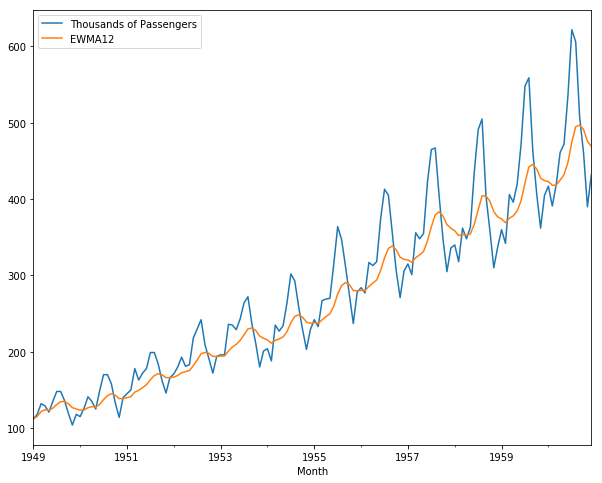

In [36]:
airline[['Thousands of Passengers','EWMA12']].plot(figsize=(10,8));

# ETS-Decomposition

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
airline = pd.read_csv('../08-Time-Series-Analysis/airline_passengers.csv',index_col="Month")

In [39]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 1949-01 to International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Data columns (total 1 columns):
Thousands of Passengers    144 non-null float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [40]:
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Thousands of Passengers    144 non-null float64
dtypes: float64(1)
memory usage: 2.2 KB


## ETS

We can use an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers). A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

Based off this chart, it looks like the trend in these earlier days is slightly increasing at a higher rate than just linear (although it is a  bit hard to tell from this one plot).

In [42]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

In [47]:
result.seasonal.head()

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
Name: Thousands of Passengers, dtype: float64

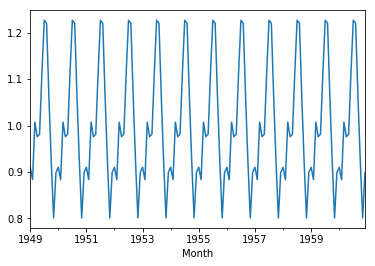

In [48]:
result.seasonal.plot()

In [49]:
result.trend.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: Thousands of Passengers, dtype: float64

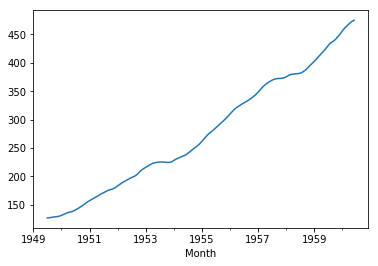

In [50]:
result.trend.plot()

In [51]:
result = seasonal_decompose(airline['Thousands of Passengers'], model="additive")

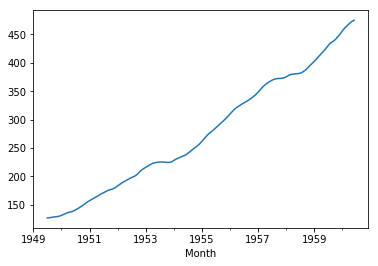

In [52]:
result.trend.plot()

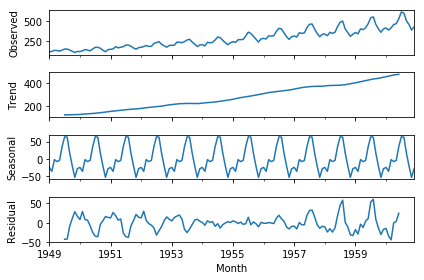

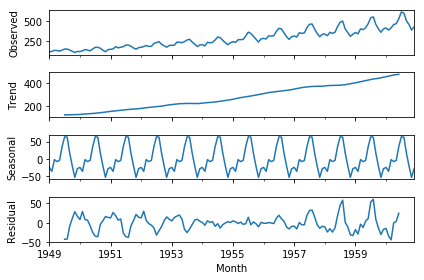

In [53]:
result.plot()

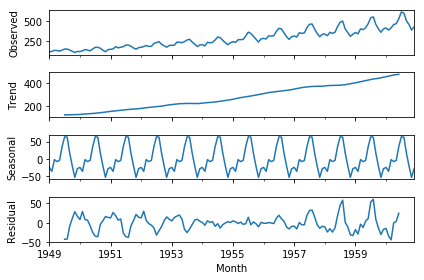

In [54]:
fig = result.plot()

# ARIMA and Seasonal ARIMA

## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model
* Use the model to make predictions

Let's go through these steps!

**Step 1: Get the Data (and format it)**

In [1]:
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\IS96347\AppData\Local\Continuum\anaconda3\envs\pyfinance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('../08-Time-Series-Analysis/monthly-milk-production-pounds-p.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
Month                                                       169 non-null object
Monthly milk production: pounds per cow. Jan 62 ? Dec 75    168 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.columns = ["Month", "Milk in pounds per cow"]

In [8]:
df["Month"] = pd.to_datetime(df["Month"])

In [9]:
df.set_index("Month", inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
Milk in pounds per cow    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [11]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


**Step 2: Visualize the Data**

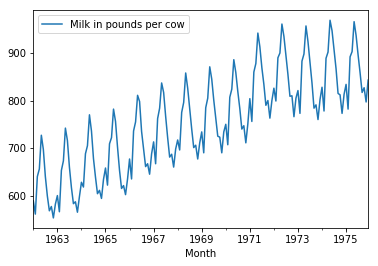

In [14]:
df.plot()

In [15]:
time_series = df['Milk in pounds per cow']

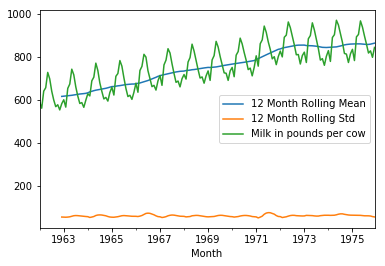

In [16]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

**Decomposition**

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
decomp = seasonal_decompose(time_series)

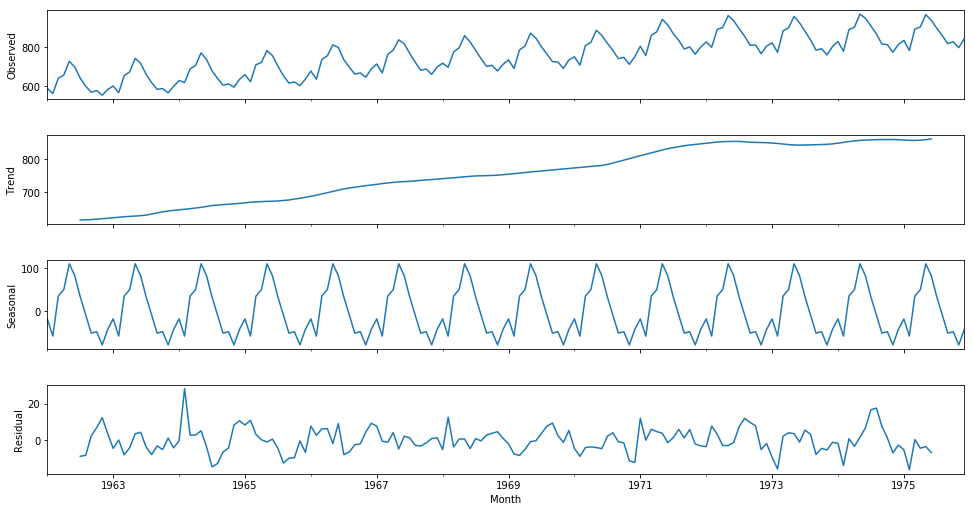

In [20]:
fig = decomp.plot()
fig.set_size_inches(15,8)

In [21]:
decomp = seasonal_decompose(time_series, freq=12)

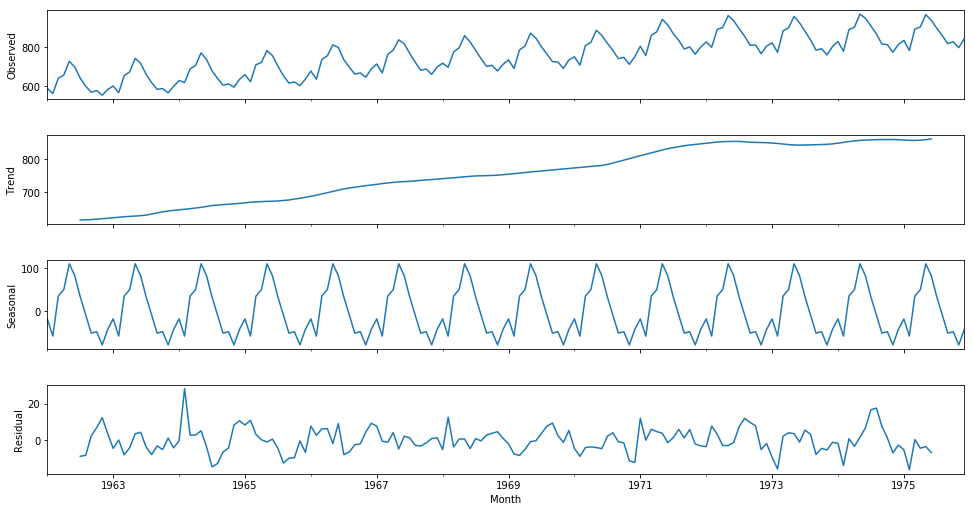

In [22]:
fig = decomp.plot()
fig.set_size_inches(15,8)

## Testing for Stationarity

We can use the Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [23]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
result = adfuller(df['Milk in pounds per cow'])
result

(-1.3038115874221228,
 0.62742670860303473,
 13,
 154,
 {'1%': -3.4735425281962091,
  '5%': -2.880497674144038,
  '10%': -2.5768780536346769},
 1115.1730447395112)

In [26]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has not unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root, it is non-stationary")

In [27]:
adf_check(df["Milk in pounds per cow"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.30381158742
p-value : 0.627426708603
# of lags : 13
Num of Observations Used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


## Differencing

**First Difference**

In [28]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

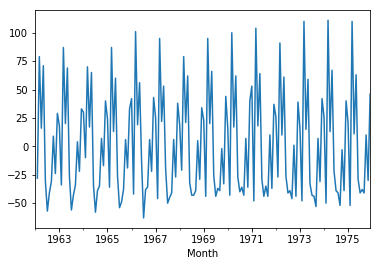

In [29]:
df["Milk First Difference"].plot()

In [30]:
adf_check(df["Milk First Difference"].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.05499555865
p-value : 0.0300680040018
# of lags : 14
Num of Observations Used : 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has not unit root and is stationary


**Second Difference**

In [31]:
df['Milk Second Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(1)

In [32]:
adf_check(df["Milk Second Difference"].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.3278736456
p-value : 1.11269893321e-26
# of lags : 11
Num of Observations Used : 154
Strong evidence against null hypothesis
Reject null hypothesis
Data has not unit root and is stationary


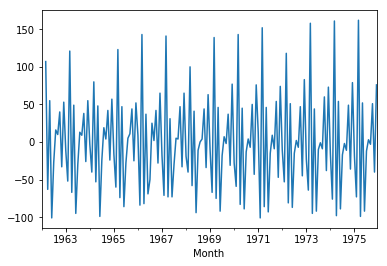

In [33]:
df["Milk Second Difference"].plot()

**Seasonal Difference**

In [34]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)

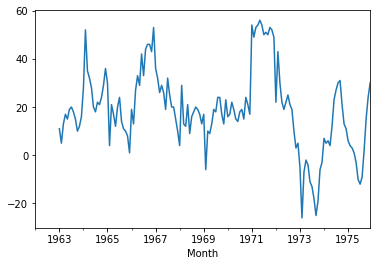

In [35]:
df['Seasonal Difference'].plot()

In [36]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.33541931436
p-value : 0.160798805277
# of lags : 12
Num of Observations Used : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


**Seasonal First Difference**

In [37]:
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)

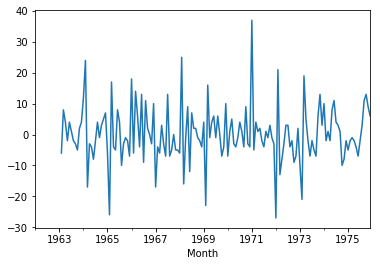

In [38]:
df['Seasonal First Difference'].plot()

In [39]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.03800227492
p-value : 1.86542343188e-05
# of lags : 11
Num of Observations Used : 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has not unit root and is stationary


# Autocorrelation and Partial Autocorrelation Plots

An autocorrelation plot (also known as a [Correlogram](https://en.wikipedia.org/wiki/Correlogram) ) shows the correlation of the series with itself, lagged by x time units. So the y axis is the correlation and the x axis is the number of time units of lag.

So imagine taking your time series of length T, copying it, and deleting the first observation of copy #1 and the last observation of copy #2. Now you have two series of length T−1 for which you calculate a correlation coefficient. This is the value of of the vertical axis at x=1x=1 in your plots. It represents the correlation of the series lagged by one time unit. You go on and do this for all possible time lags x and this defines the plot.

You will run these plots on your differenced/stationary data. There is a lot of great information for identifying and interpreting ACF and PACF [here](http://people.duke.edu/~rnau/arimrule.htm) and [here](https://people.duke.edu/~rnau/411arim3.htm).

## Autocorrelation Interpretation

The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use. In general you would use either AR or MA, using both is less common.

* If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

* If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms.

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

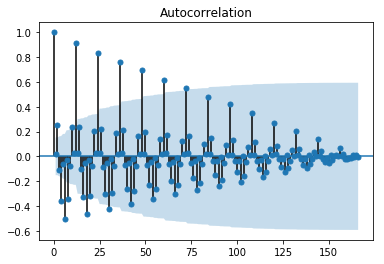

In [41]:
fig_first = plot_acf(df["Milk First Difference"].dropna())

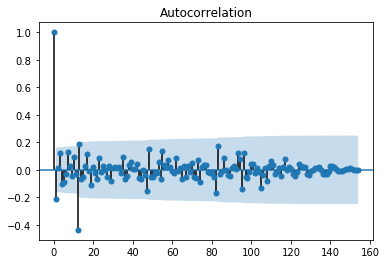

In [42]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())

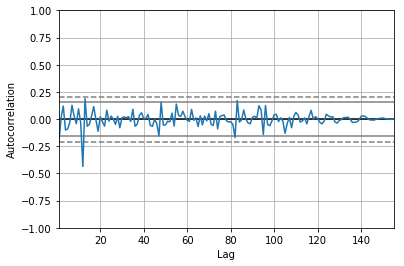

In [43]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

## Partial Autocorrelation

In general, a partial correlation is a conditional correlation.

It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.

For instance, consider a regression context in which y = response variable and x1, x2, and x3 are predictor variables.  The partial correlation between y and x3 is the correlation between the variables determined taking into account how both y and x3 are related to x1 and x2.

Formally, this is relationship is defined as:

## $\frac{\text{Covariance}(y, x_3|x_1, x_2)}{\sqrt{\text{Variance}(y|x_1, x_2)\text{Variance}(x_3| x_1, x_2)}}$

Check out this [link](http://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm) for full details on this.

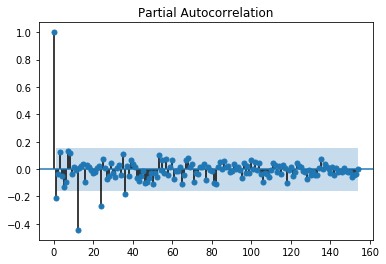

In [44]:
result = plot_pacf(df["Seasonal First Difference"].dropna())

# Using the Seasonal ARIMA model

In [45]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [46]:
# I recommend you glance over this!
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |  If exogenous variables are given, then the model that is fit is
 

### p,d,q parameters

* p: The number of lag observations included in the model.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

In [47]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Thu, 07 Jun 2018   AIC                           1074.131
Time:                                    14:46:20   BIC                           1083.503
Sample:                                01-01-1962   HQIC                          1077.934
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

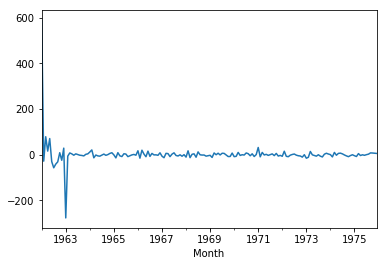

In [48]:
results.resid.plot()

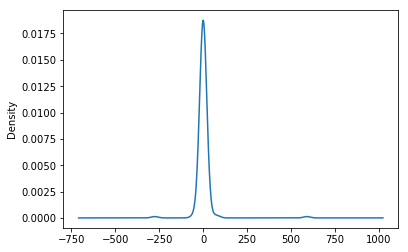

In [49]:
results.resid.plot(kind='kde')

## Prediction of Future Values

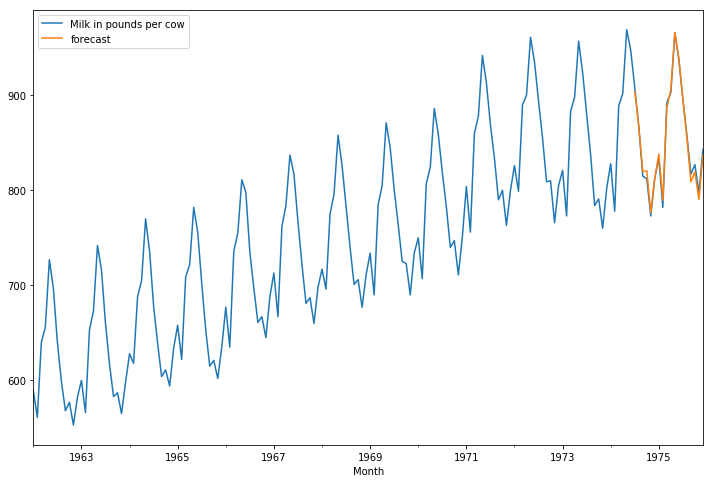

In [59]:
df['forecast'] = results.predict(start=150, end=168)
df[['Milk in pounds per cow','forecast']].plot(figsize=(12,8))

**Forecasting**

In [52]:
# https://pandas.pydata.org/pandas-docs/stable/timeseries.html
# Alternatives 
# pd.date_range(df.index[-1],periods=12,freq='M')

In [53]:
from pandas.tseries.offsets import DateOffset

In [54]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [62]:
future_dates_df = pd.DataFrame(index=future_dates,columns=df.columns)

In [63]:
future_dates_df

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1975-12-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
future_df = pd.concat([df,future_dates_df])
future_df.head()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [65]:
future_df.tail()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


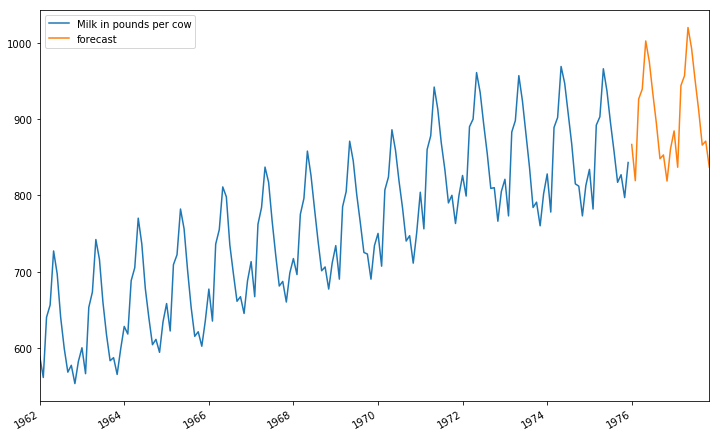

In [66]:
future_df['forecast'] = results.predict(start=168, end=192)
future_df[['Milk in pounds per cow', 'forecast']].plot(figsize=(12, 8))